In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [4]:
# Sets the units to imperial to return Fahrenheit temperatures
units = "imperial"

# Sets the url for the API search to only need the city name added at the end
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

#Sets up lists to hold required information
foundcity = []
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

# Sets a counter to determine how many API Calls are being made
counter = 0

# Loops through the created list of cities
for city in cities:
    
    # Sets up the url with the current city
    queryurl = url + city
    
    # Makes the API request with the current city
    response = requests.get(queryurl).json()
    
    # Allows the program to continue if the city can't be found
    try:
        
        # Adds all the needed information to their respective lists
        foundcity.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        #Iterates the counter
        counter += 1
        
        # Prints an output to make sure the requests are going through
        print(f"Processing Record {counter} | {city}")
    
    # Prints out if the city was not found and moves to the next iteration of the loop
    except:
        print("City not found. Skipping...")
        pass


Processing Record 1 | henties bay
Processing Record 2 | coihaique
Processing Record 3 | noumea
Processing Record 4 | chicama
Processing Record 5 | kloulklubed
Processing Record 6 | bredasdorp
Processing Record 7 | kapaa
City not found. Skipping...
Processing Record 8 | havelock
City not found. Skipping...
City not found. Skipping...
Processing Record 9 | jamestown
Processing Record 10 | phangnga
Processing Record 11 | mahebourg
Processing Record 12 | castro
Processing Record 13 | busselton
Processing Record 14 | vestmannaeyjar
Processing Record 15 | skjervoy
Processing Record 16 | keflavik
Processing Record 17 | doha
Processing Record 18 | vaini
Processing Record 19 | ushuaia
City not found. Skipping...
Processing Record 20 | bengkulu
Processing Record 21 | arraial do cabo
Processing Record 22 | hilo
Processing Record 23 | punta arenas
Processing Record 24 | albany
City not found. Skipping...
Processing Record 25 | leningradskiy
Processing Record 26 | khor
Processing Record 27 | saldan

City not found. Skipping...
Processing Record 227 | marienburg
Processing Record 228 | namikupa
Processing Record 229 | ambilobe
Processing Record 230 | mezhdurechensk
Processing Record 231 | morant bay
Processing Record 232 | severo-kurilsk
Processing Record 233 | ahipara
Processing Record 234 | itarema
Processing Record 235 | lebowakgomo
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 236 | denpasar
Processing Record 237 | aitape
Processing Record 238 | porosozero
Processing Record 239 | madimba
Processing Record 240 | cayenne
Processing Record 241 | vila velha
Processing Record 242 | mbandaka
Processing Record 243 | pundaguitan
Processing Record 244 | bloemfontein
Processing Record 245 | bowen
Processing Record 246 | mogilno
Processing Record 247 | lavrentiya
Processing Record 248 | buta
Processing Record 249 | pevek
Processing Record 250 | grand island
Processing Record 251 | saint-francois
Processing Record 252 | ngawen
Process

Processing Record 456 | yeppoon
Processing Record 457 | la paz
Processing Record 458 | corumba
Processing Record 459 | tucuma
Processing Record 460 | verkhnevilyuysk
Processing Record 461 | longford
Processing Record 462 | nacala
Processing Record 463 | karasburg
Processing Record 464 | flinders
Processing Record 465 | iwanai
Processing Record 466 | gorontalo
Processing Record 467 | matara
Processing Record 468 | esso
Processing Record 469 | dawlatabad
Processing Record 470 | bereznik
Processing Record 471 | sorong
Processing Record 472 | tabou
Processing Record 473 | iguape
Processing Record 474 | helong
Processing Record 475 | melilla
Processing Record 476 | yichun
Processing Record 477 | inongo
Processing Record 478 | myitkyina
Processing Record 479 | bluefield
Processing Record 480 | cedar city
Processing Record 481 | kungurtug
Processing Record 482 | aurangabad
Processing Record 483 | mozarlandia
Processing Record 484 | eskil
Processing Record 485 | beipiao
Processing Record 486 |

In [11]:
citydata = pd.DataFrame({
    "City": foundcity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date
})
# Outputs dataframe to CSV file
citydata.to_csv("Output_Data/cities.csv", index=False)

# Displays the dataframe
citydata.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Henties Bay,-22.1160,14.2845,64.40,81,0,8.10,NA,1649706196
1,Coyhaique,-45.5752,-72.0662,57.81,47,40,8.05,CL,1649706001
2,Noumea,-22.2763,166.4572,78.01,99,22,5.57,NC,1649706197
3,Chicama,-7.8447,-79.1469,66.74,66,78,11.01,PE,1649706646
4,Kloulklubed,7.0419,134.2556,82.76,84,99,23.53,PW,1649706646


In [12]:
# Check to see if any of the humidity values are over 100
citydata.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,20.563888,23.760962,58.544076,69.715580,55.621377,8.630507,1.649707e+09
std,33.551833,90.445094,24.719215,23.539068,39.568358,5.981910,2.602023e+02
min,-54.800000,-175.200000,-21.410000,1.000000,0.000000,0.000000,1.649706e+09
25%,-8.466700,-56.723950,42.120000,56.000000,18.750000,3.955000,1.649706e+09
50%,25.201700,27.424600,64.515000,76.000000,62.000000,7.620000,1.649707e+09
75%,49.337425,102.644700,78.360000,88.000000,99.000000,11.505000,1.649707e+09
max,78.218600,179.316700,101.800000,100.000000,100.000000,35.680000,1.649707e+09


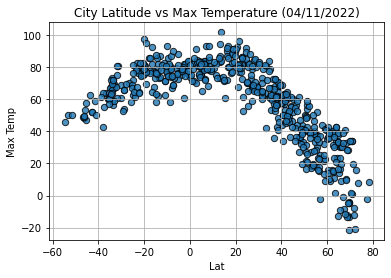

In [31]:
# Plots the latitude vs the max temperature on a scatter plot
citydata.plot("Lat", "Max Temp", kind="scatter", title="City Latitude vs Max Temperature (04/11/2022)",
             grid=True, s=40, edgecolors="black", alpha=0.80)

# Saves the plot as a png file in the output folder
plt.savefig("Output_Data/Latitude_Temperature.png")

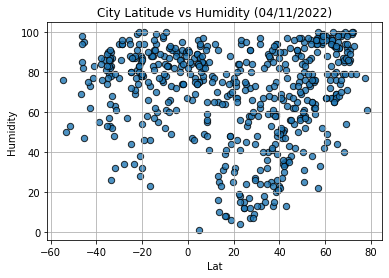

In [32]:
# Plots the latitude vs the humidity on a scatter plot
citydata.plot("Lat", "Humidity", kind="scatter", title="City Latitude vs Humidity (04/11/2022)",
             grid=True, s=40, edgecolors="black", alpha=0.80)

# Saves the plot as a png file in the output folder
plt.savefig("Output_Data/Latitude_Humidity.png")

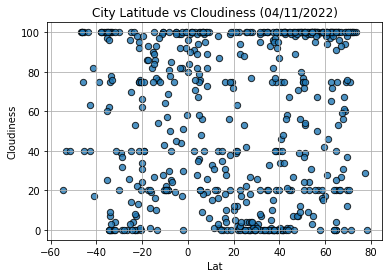

In [34]:
# Plots the latitude vs the cloudiness on a scatter plot
citydata.plot("Lat", "Cloudiness", kind="scatter", title="City Latitude vs Cloudiness (04/11/2022)",
             grid=True, s=40, edgecolors="black", alpha=0.80)

# Saves the plot as a png file in the output folder
plt.savefig("Output_Data/Latitude_Cloudiness.png")

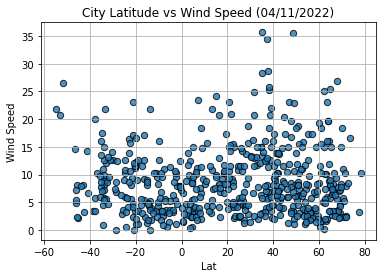

In [35]:
# Plots the latitude vs the wind speed on a scatter plot
citydata.plot("Lat", "Wind Speed", kind="scatter", title="City Latitude vs Wind Speed (04/11/2022)",
             grid=True, s=40, edgecolors="black", alpha=0.80)

# Saves the plot as a png file in the output folder
plt.savefig("Output_Data/Latitude_WindSpeed.png")

The r-value is: 0.7634187199392178


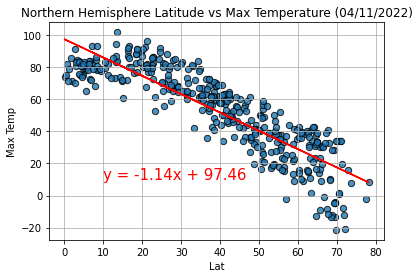

In [47]:
# Splits the cities into 2 data frames by northern and southern hemispheres
northernhem = citydata.loc[citydata["Lat"] > 0]
southernhem = citydata.loc[citydata["Lat"] < 0]

# Plots the latitude vs temperature for northern hemisphere cities
northernhem.plot("Lat", "Max Temp", kind="scatter", grid=True, s=40, edgecolors="black", alpha=0.80,
            title="Northern Hemisphere Latitude vs Max Temperature (04/11/2022)")

# Sets the x and y values for the linear regression
x_values = northernhem["Lat"]
y_values = northernhem["Max Temp"]

# Sets up the linear regression and adds to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")

# Prints the r-value
print(f"The r-value is: {rvalue**2}")

# Saves the plot as a png file in the output folder
plt.savefig("Output_Data/NH_Latitude_Temperature.png")

The r-value is: 0.484629200059057


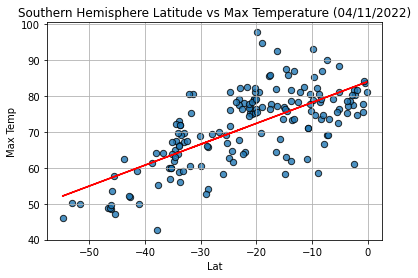

In [48]:
# Plots the latitude vs temperature for southern hemisphere cities
southernhem.plot("Lat", "Max Temp", kind="scatter", grid=True, s=40, edgecolors="black", alpha=0.80,
            title="Southern Hemisphere Latitude vs Max Temperature (04/11/2022)")

# Sets the x and y values for the linear regression
x_values = southernhem["Lat"]
y_values = southernhem["Max Temp"]

# Sets up the linear regression and adds to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")

# Prints the r-value
print(f"The r-value is: {rvalue**2}")

# Saves the plot as a png file in the output folder
plt.savefig("Output_Data/SH_Latitude_Temperature.png")

The r-value is: 0.06394262442445914


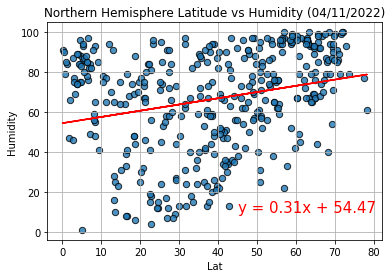

In [52]:
# Plots the latitude vs humidity for northern hemisphere cities
northernhem.plot("Lat", "Humidity", kind="scatter", grid=True, s=40, edgecolors="black", alpha=0.80,
            title="Northern Hemisphere Latitude vs Humidity (04/11/2022)")

# Sets the x and y values for the linear regression
x_values = northernhem["Lat"]
y_values = northernhem["Humidity"]

# Sets up the linear regression and adds to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Prints the r-value
print(f"The r-value is: {rvalue**2}")

# Saves the plot as a png file in the output folder
plt.savefig("Output_Data/NH_Latitude_Humidity.png")

The r-value is: 0.020703730269271


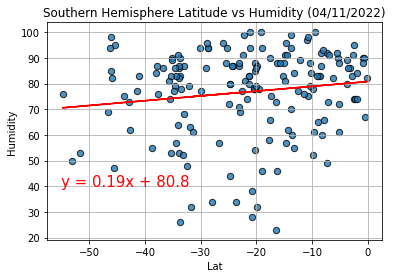

In [56]:
# Plots the latitude vs humidity for southern hemisphere cities
southernhem.plot("Lat", "Humidity", kind="scatter", grid=True, s=40, edgecolors="black", alpha=0.80,
            title="Southern Hemisphere Latitude vs Humidity (04/11/2022)")

# Sets the x and y values for the linear regression
x_values = southernhem["Lat"]
y_values = southernhem["Humidity"]

# Sets up the linear regression and adds to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")

# Prints the r-value
print(f"The r-value is: {rvalue**2}")

# Saves the plot as a png file in the output folder
plt.savefig("Output_Data/SH_Latitude_Humidity.png")

The r-value is: 0.02748711200874783


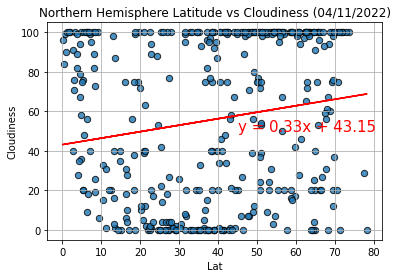

In [58]:
# Plots the latitude vs cloudiness for northern hemisphere cities
northernhem.plot("Lat", "Cloudiness", kind="scatter", grid=True, s=40, edgecolors="black", alpha=0.80,
            title="Northern Hemisphere Latitude vs Cloudiness (04/11/2022)")

# Sets the x and y values for the linear regression
x_values = northernhem["Lat"]
y_values = northernhem["Cloudiness"]

# Sets up the linear regression and adds to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")

# Prints the r-value
print(f"The r-value is: {rvalue**2}")

# Saves the plot as a png file in the output folder
plt.savefig("Output_Data/NH_Latitude_Cloudiness.png")

The r-value is: 0.000578263869668629


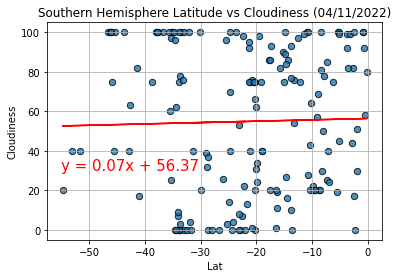

In [60]:
# Plots the latitude vs cloudiness for southern hemisphere cities
southernhem.plot("Lat", "Cloudiness", kind="scatter", grid=True, s=40, edgecolors="black", alpha=0.80,
            title="Southern Hemisphere Latitude vs Cloudiness (04/11/2022)")

# Sets the x and y values for the linear regression
x_values = southernhem["Lat"]
y_values = southernhem["Cloudiness"]

# Sets up the linear regression and adds to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# Prints the r-value
print(f"The r-value is: {rvalue**2}")

# Saves the plot as a png file in the output folder
plt.savefig("Output_Data/SH_Latitude_Cloudiness.png")

The r-value is: 1.873826287504089e-05


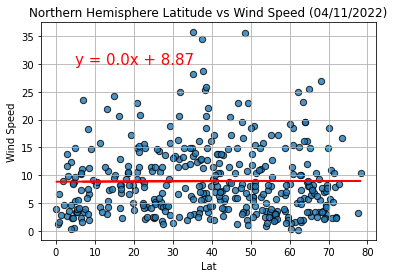

In [62]:
# Plots the latitude vs wind speed for northern hemisphere cities
northernhem.plot("Lat", "Wind Speed", kind="scatter", grid=True, s=40, edgecolors="black", alpha=0.80,
            title="Northern Hemisphere Latitude vs Wind Speed (04/11/2022)")

# Sets the x and y values for the linear regression
x_values = northernhem["Lat"]
y_values = northernhem["Wind Speed"]

# Sets up the linear regression and adds to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")

# Prints the r-value
print(f"The r-value is: {rvalue**2}")

# Saves the plot as a png file in the output folder
plt.savefig("Output_Data/NH_Latitude_WindSpeed.png")

The r-value is: 0.08406285484211971


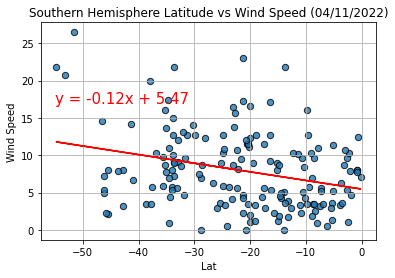

In [64]:
# Plots the latitude vs wind speed for southern hemisphere cities
southernhem.plot("Lat", "Wind Speed", kind="scatter", grid=True, s=40, edgecolors="black", alpha=0.80,
            title="Southern Hemisphere Latitude vs Wind Speed (04/11/2022)")

# Sets the x and y values for the linear regression
x_values = southernhem["Lat"]
y_values = southernhem["Wind Speed"]

# Sets up the linear regression and adds to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,17),fontsize=15,color="red")

# Prints the r-value
print(f"The r-value is: {rvalue**2}")

# Saves the plot as a png file in the output folder
plt.savefig("Output_Data/SH_Latitude_WindSpeed.png")